# Statistics - Exploratory Data Analysis

- Histogram plots
- Scatter plots
- Percentiles
- Boxplots
- Violin
- Heatmaps
- Barplots
- Factor plots
- Density plots
- Joint Distribution plots

In [2]:
import pandas as pd
import numpy as np

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Simple Descriptive Analysis

In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Let's start plotting using a Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52f3db2b10>]],
      dtype=object)

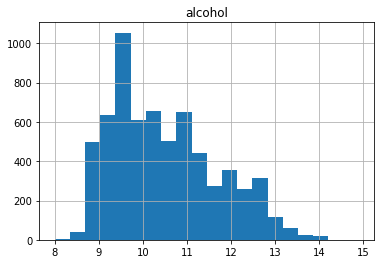

In [9]:
df.hist(column='alcohol', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52f3c59c10>]],
      dtype=object)

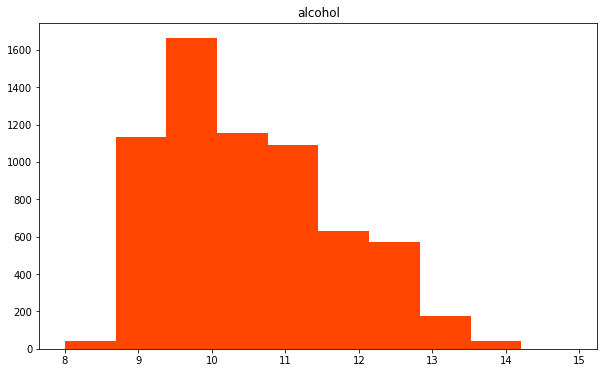

In [11]:
# Let's get a bit more advanced and learn to customize your plots

df.hist(column='alcohol', bins=10, grid=False, figsize=(10,6), color='#FF4500')

# These look nice, but using the library Seaborn, we can quickly produce even nicer plots

In [20]:
import seaborn as sns

sns.distplot(df['alcohol'], bins=20, kde=False) # ==> KDE = Kernel Density Estimation

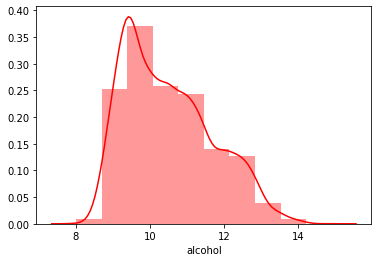

In [14]:
sns.distplot(df['alcohol'], bins=10, kde=True, color="red")

# Styling and Axis Labels
https://seaborn.pydata.org/tutorial/aesthetics.html?highlight=style

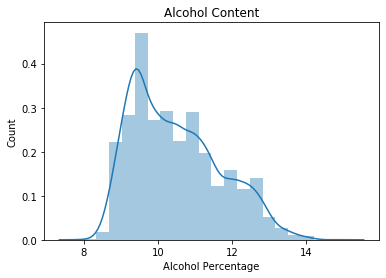

In [17]:
# Let's start with labeling our axis

import matplotlib.pyplot as plt

_ = sns.distplot(df['alcohol'], bins=20)
_ = plt.xlabel('Alcohol Percentage')
_ = plt.ylabel('Count')
_ = plt.title("Alcohol Content")
#plt.show()

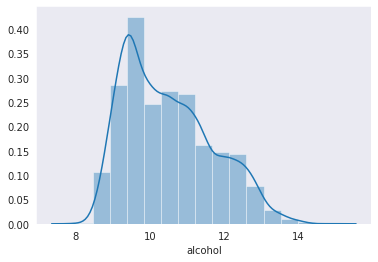

In [18]:
#Use sns.set_style() to control styling

sns.set_style("dark")
sns.distplot(df['alcohol'], bins=15)

# Scatter Plots

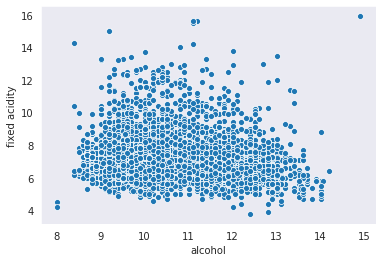

In [19]:
sns.scatterplot(x='alcohol', y='fixed acidity', data=df)

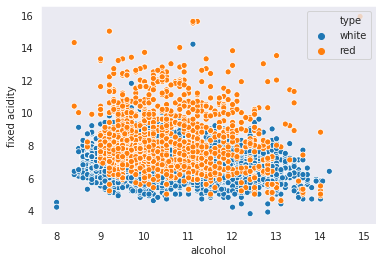

In [20]:
# Scatterplot arguments
sns.scatterplot(x='alcohol', y='fixed acidity', data=df,
                hue='type')   # Color by type

# Understanding Percentiles

In [3]:
# The quantile function 

print(df["alcohol"].quantile(0.1))
print(df["alcohol"].quantile(0.5))
print(df["alcohol"].quantile(0.9))
print(df["alcohol"].quantile(0.99))

9.1
10.3
12.3
13.4


In [4]:
# What's the max alcohol value though?
df["alcohol"].max()

14.9

In [5]:
# Quantile ranges

df["alcohol"].quantile(([0.05, 0.95]))

0.05     9.0
0.95    12.7
Name: alcohol, dtype: float64

In [13]:
Q1 = df['alcohol'].quantile(0.25)
Q1

9.5

In [10]:
Q2 = df['alcohol'].quantile(0.5)
Q2

10.3

In [11]:
Q3 = df['alcohol'].quantile(0.75)
Q3

11.3

In [14]:
IQR = Q3 - Q1
IQR

1.8000000000000007

In [15]:
Q3 + 1.5*IQR

14.000000000000002

In [16]:
Q1 - 1.5*IQR

6.799999999999999

In [17]:
df['alcohol'].max()

14.9

In [18]:
df['alcohol'].min()

8.0

# Boxplots & Finding Outliers

https://seaborn.pydata.org/generated/seaborn.boxplot.html

![alt text](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

0.25     9.5
0.75    11.3
Name: alcohol, dtype: float64


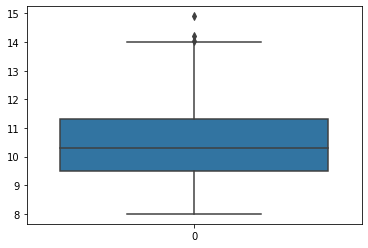

In [21]:
print(df["alcohol"].quantile(([0.25, 0.75])))
sns.boxplot(data=df['alcohol'])

In [22]:
arr1 = np.random.randint(1,20,50)
arr2 = np.random.randint(70,95,50)
arr = np.hstack((arr1,arr2))
arr

array([ 5,  7,  8, 13, 13,  6, 19,  1, 13,  9, 10,  3,  8,  9, 15, 18,  4,
        3, 11, 15, 16, 15,  1,  2,  5, 19,  6,  6, 13, 17,  9, 16,  3, 19,
        5, 18,  3, 15,  1,  5, 13, 16,  1,  6,  6, 11, 18, 19,  7, 10, 93,
       84, 74, 74, 86, 77, 78, 90, 80, 72, 90, 72, 92, 71, 77, 74, 81, 70,
       74, 90, 79, 79, 79, 71, 92, 74, 74, 79, 86, 90, 71, 84, 88, 71, 83,
       92, 92, 75, 85, 75, 81, 77, 71, 72, 80, 77, 92, 89, 81, 85])

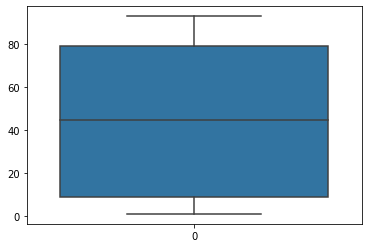

In [23]:
sns.boxplot(data=arr)

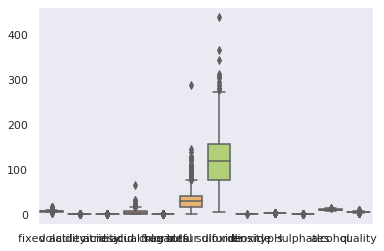

In [46]:
sns.boxplot(data=df, palette="Set3")

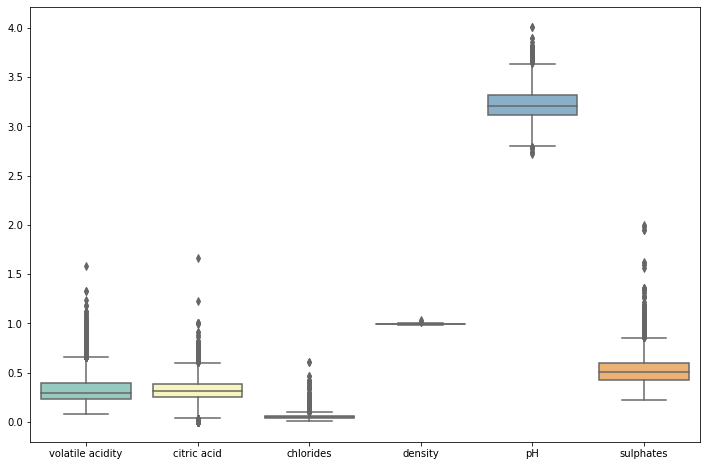

In [28]:
from matplotlib import pyplot as plt

# Enlarge the plot
plt.figure(figsize=(12,8))

summary = df.drop(['free sulfur dioxide', 'total sulfur dioxide', 'quality',
                   'residual sugar', 'fixed acidity', 'alcohol'], axis=1)
sns.boxplot(data=summary, palette="Set3")

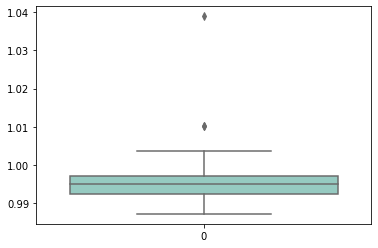

In [29]:
sns.boxplot(data=df['density'], palette="Set3")

# Violin Plots

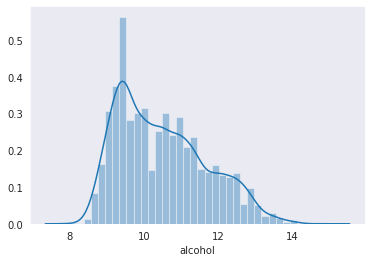

In [30]:
#Use sns.set_style() to control styling

sns.set_style("dark")
sns.distplot(df['alcohol'])

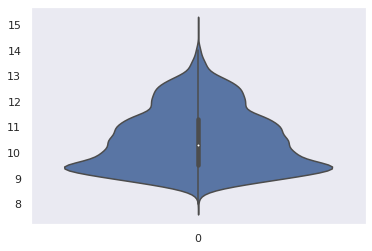

In [48]:
sns.violinplot(data=df['alcohol'])

In [32]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

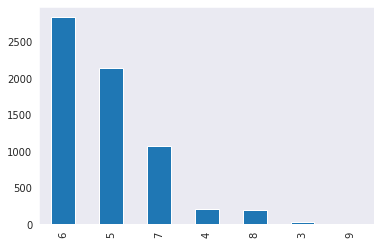

In [33]:
df['quality'].value_counts().plot.bar()

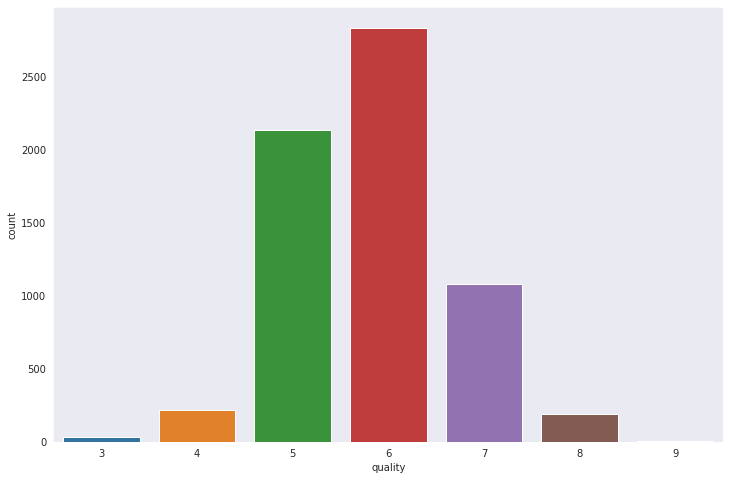

In [31]:
# Bar Plot

# Enlarge the plot
plt.figure(figsize=(12,8))

sns.countplot(x='quality', data=df)

In [34]:
# Titanic Example

sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


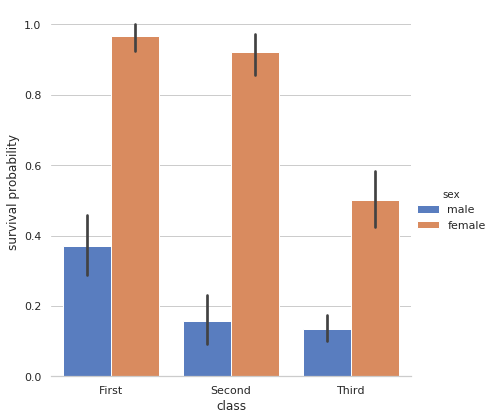

In [39]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

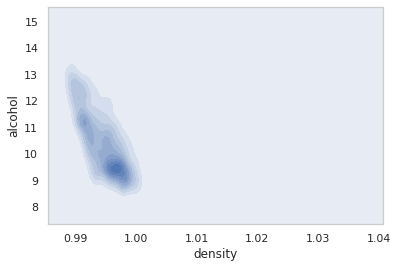

In [44]:
# Density Plot
sns.kdeplot(df['density'], df['alcohol'], shade=True)

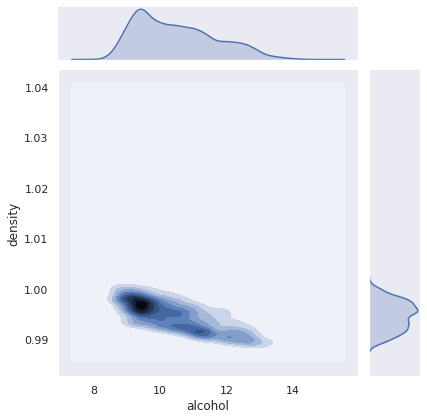

In [47]:
# Joint Distribution Plot
sns.set(style="dark")
sns.jointplot(x='alcohol', y='density', data=df, kind='kde')

# Factor Plots and Bee Swarm Plots

Factor plots allow us to create separate plots by categorical classes.

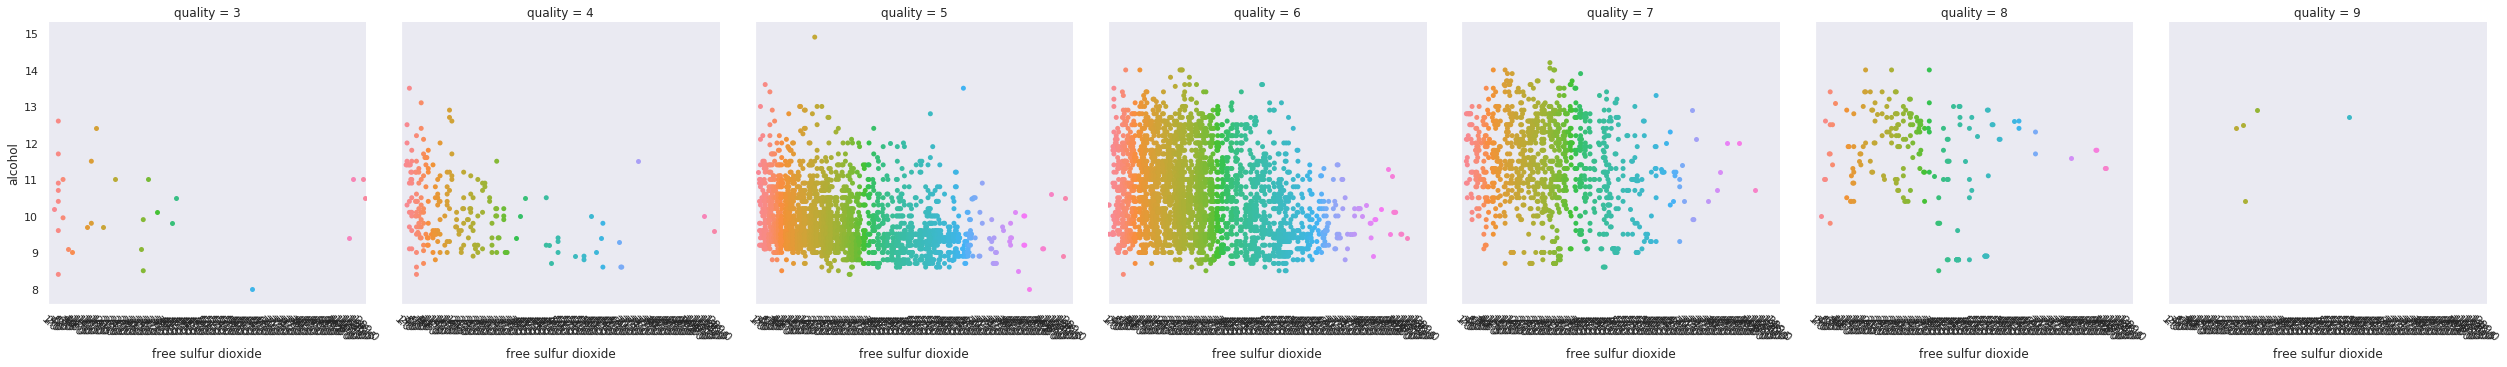

In [49]:
# Factor Plot
g = sns.factorplot(x='free sulfur dioxide', 
                   y='alcohol', 
                   data=df, 
                   # A recent update in Matplotlib broke how the hue argument works in Seaborn with some plots see: https://github.com/mwaskom/seaborn/issues/1697
                   #hue='quality',  # Color by stage
                   col='quality',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# Creating Empirical cumulative distribution function (ECDF)


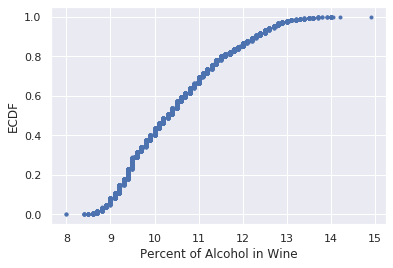

In [50]:
import numpy as np

x = np.sort(df['alcohol'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.05)
_ = plt.xlabel('Percent of Alcohol in Wine') 
_ = plt.ylabel('ECDF') 
plt.grid(True)
plt.show()

In [53]:
d = pd.DataFrame({'a':list(np.linspace(1,20,20))})
d['Cumulative Addition'] = d['a'].cumsum()
d

,a,Cumulative Addition
0,1.0,1.0
1,2.0,3.0
2,3.0,6.0
3,4.0,10.0
4,5.0,15.0
5,6.0,21.0
6,7.0,28.0
7,8.0,36.0
8,9.0,45.0
9,10.0,55.0


In [0]:
print(df["alcohol"].quantile(([0.2, 0.8])))

0.2     9.4
0.8    11.5
Name: alcohol, dtype: float64
